In [2]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [3]:
df = pd.read_csv("./results/oob/mm_oob_fr.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
time_cols = ["conversion_in0",	"conversion_in1",	"transfer_in0",	"transfer_in1",	"tilization_in0",	"tilization_in1",	"first_run", "second_run", "compile_time"]
for col in time_cols:
    if col in df.columns:
        df[col] = df[col].values * 1e6
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,first_run,second_run,compile_time
0,f16_m4,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,675.053596,307.075977,362.796783,212.779045,303144.228458,289.502144,590911.643505,378.108025,590533.535480
1,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,8214.960098,315.864086,1194.291115,374.355316,290765.852928,296.885967,596449.098587,376.193523,596072.905064
2,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,6178.357601,308.692455,1640.901566,970.871449,283801.462650,376.603603,593151.571751,523.178577,592628.393173
3,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,447.249413,313.267708,3625.919819,3460.280895,287045.400143,709.834099,606579.174995,1201.982498,605377.192497
4,f16_m4,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,425.815582,317.387581,7647.809982,7556.674480,281286.759377,1390.650272,604621.257782,2507.727146,602113.530636
5,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,521.719456,316.474438,13310.384750,13242.559433,282910.830975,2105.545998,611702.067852,4798.047543,606904.020309
6,f16_m2,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,1054.768562,324.029922,572.929382,227.813721,324730.963707,311.937332,638508.136272,389.828682,638118.307590
7,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7784.740925,335.245132,1328.799725,382.792950,307526.559830,307.252407,637756.962776,378.787518,637378.175259
8,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,4596.018791,342.650414,2256.174088,1007.380486,302348.895073,385.391712,641580.939293,540.494919,641040.444374
9,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,884.490013,325.555801,3824.203014,3489.160538,303126.473427,717.349052,655895.271301,1267.437935,654627.833366


In [4]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m4': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'}}

In [5]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement

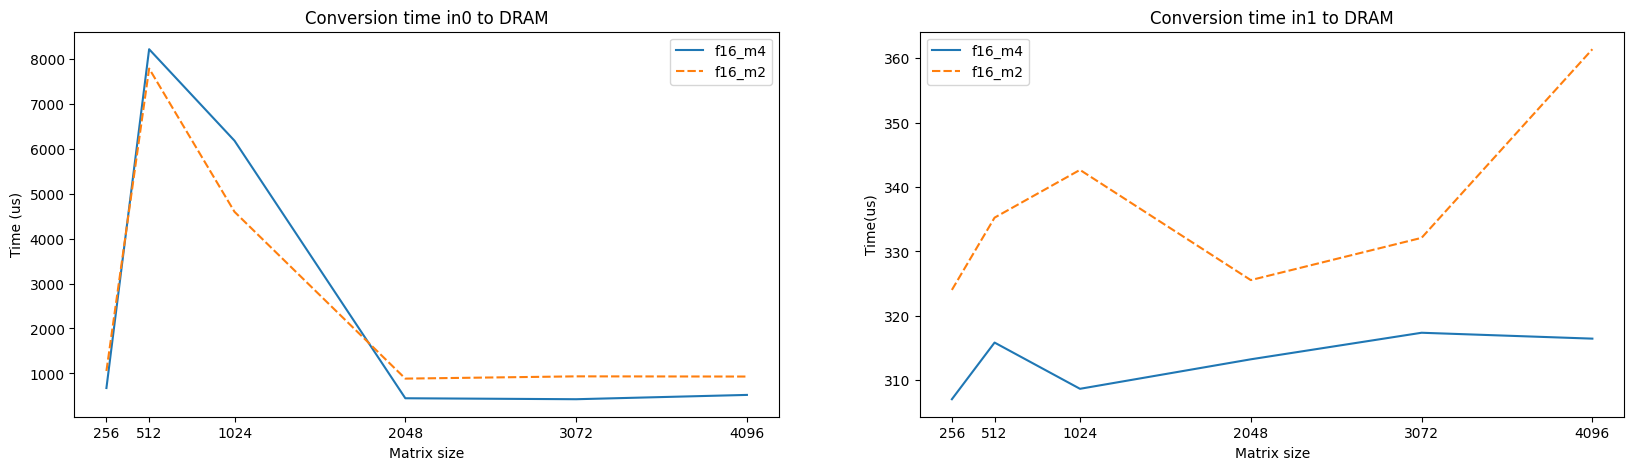

In [6]:
df_conversion0 = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1 = get_column_df_info(df, 'conversion_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_conversion0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Conversion time in0 to DRAM")

plot = sns.lineplot(df_conversion1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Conversion time in1 to DRAM")

plt.show()

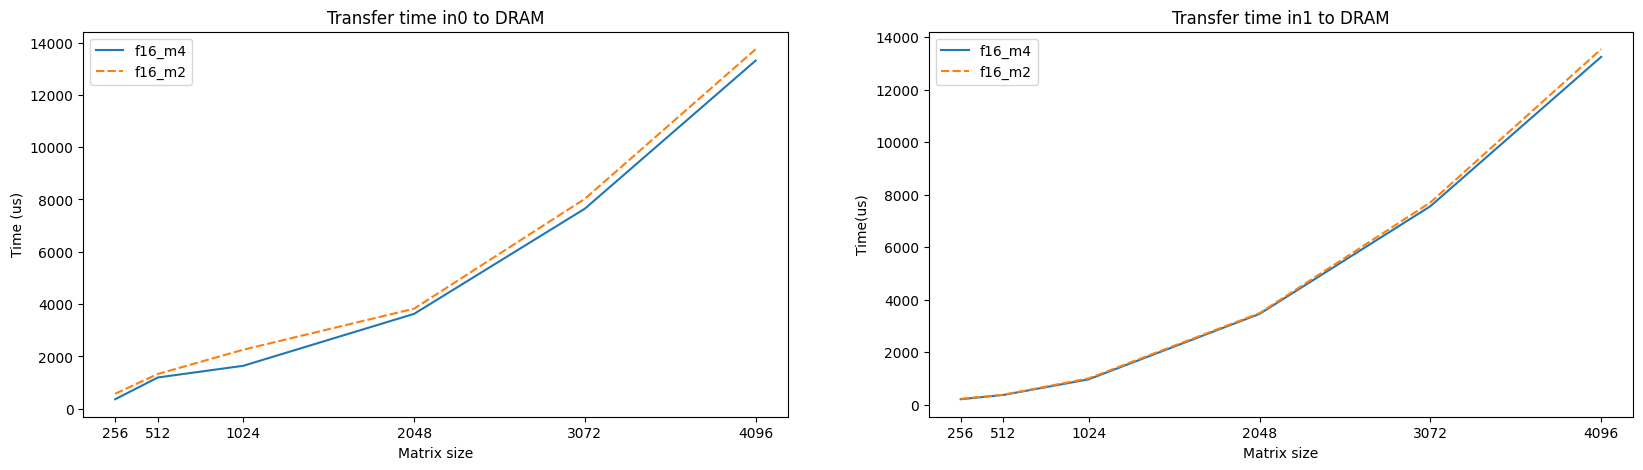

In [7]:
df_transf0 = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1 = get_column_df_info(df, 'transfer_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer time in0 to DRAM")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Transfer time in1 to DRAM")

plt.show()


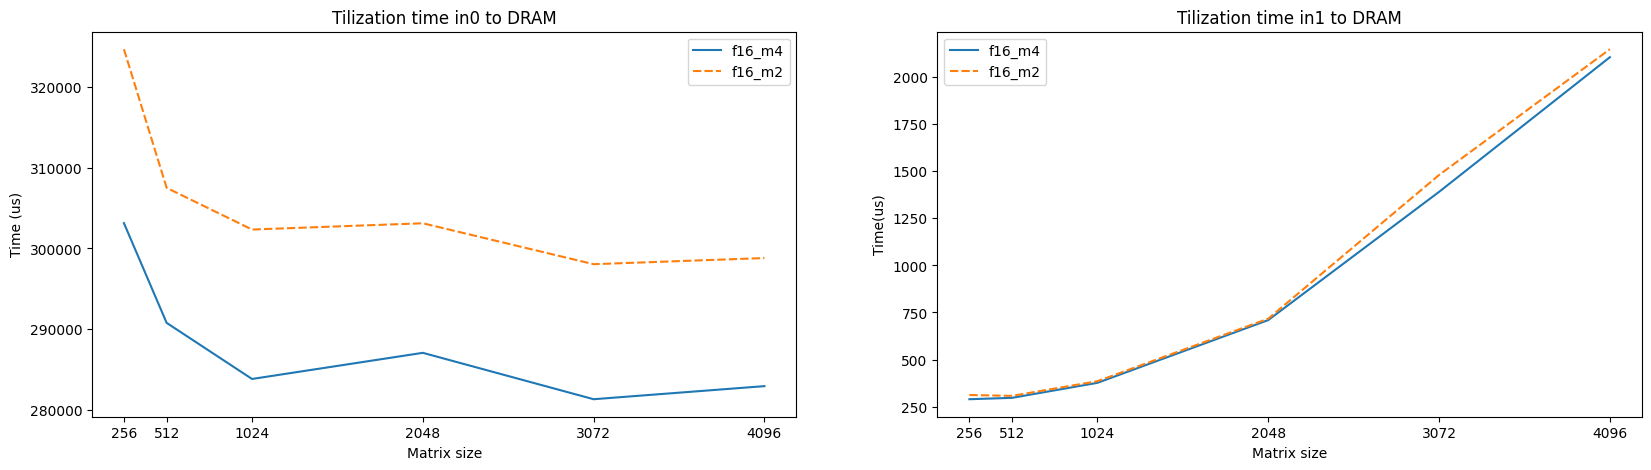

In [21]:
df_tilization0 = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1 = get_column_df_info(df, 'tilization_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_tilization0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Tilization time in0 to DRAM")

plot = sns.lineplot(df_tilization1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Tilization time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [9]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0.index * df_transf0.index
for conf in df_transf0.columns:
    df_transf_norm_b[conf] = (16 * elements) / df_transf0[conf]

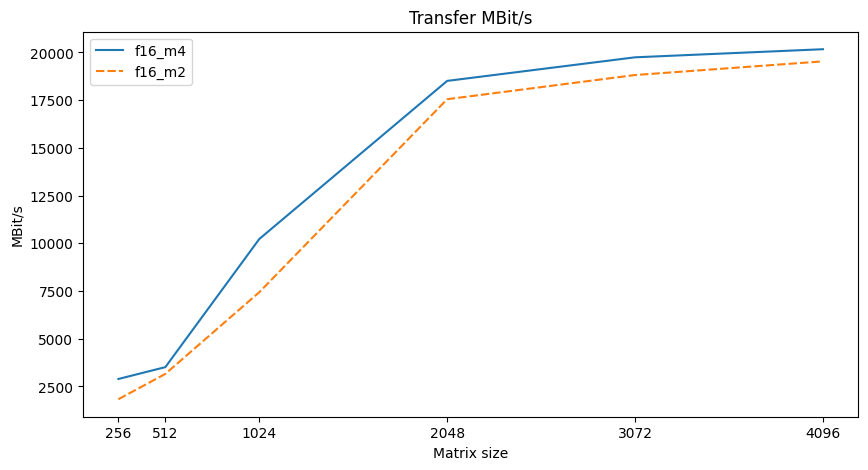

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()

## Compile time

In [11]:
df_compile = get_column_df_info(df, 'compile_time')
df_compile

,f16_m4,f16_m2
256,590533.535480,638118.307590
512,596072.905064,637378.175259
1024,592628.393173,641040.444374
2048,605377.192497,654627.833366
3072,602113.530636,637879.741192
4096,606904.020309,647220.981121


To be cleared

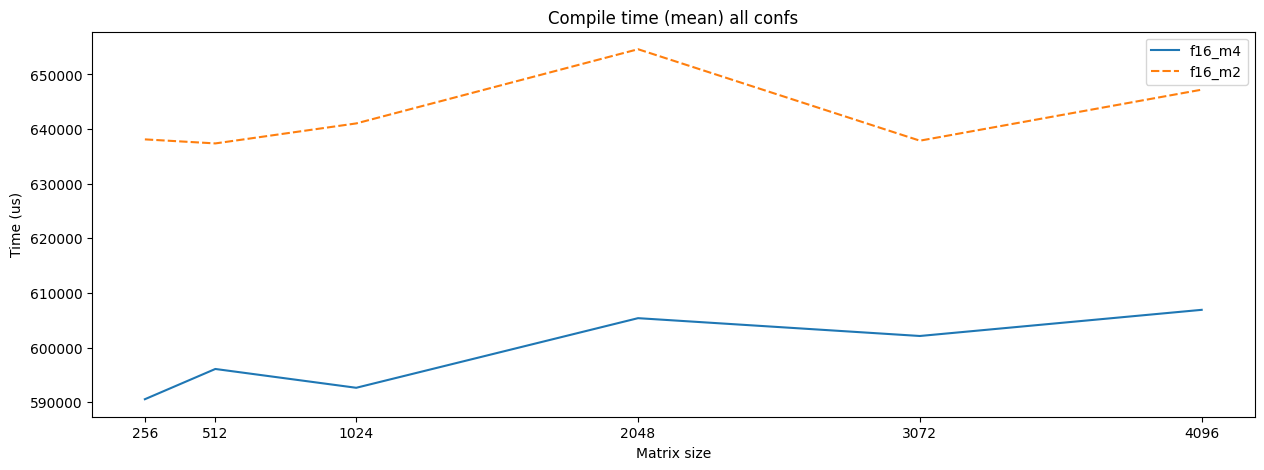

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compile, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Compile time (mean) all confs")

plt.show()

Mmhhhh..

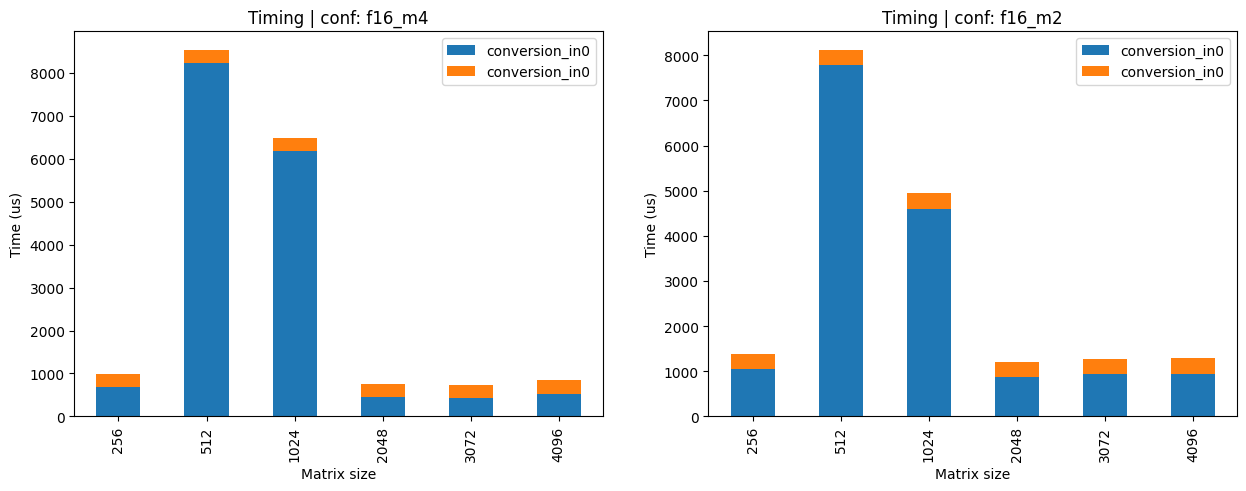

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in0"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

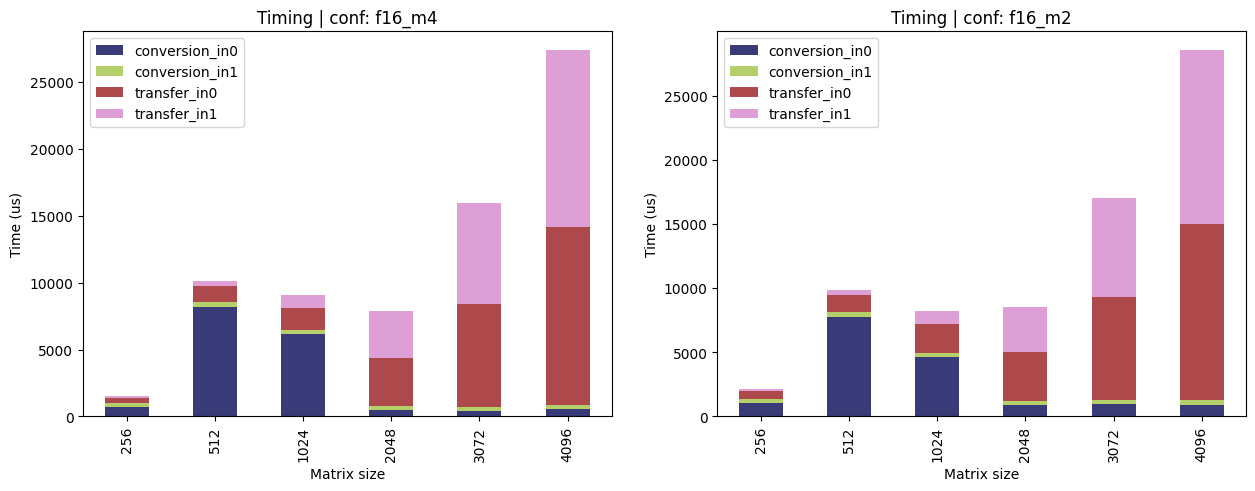

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf], df_transf0[conf], df_transf1[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in1", "transfer_in0", "transfer_in1"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

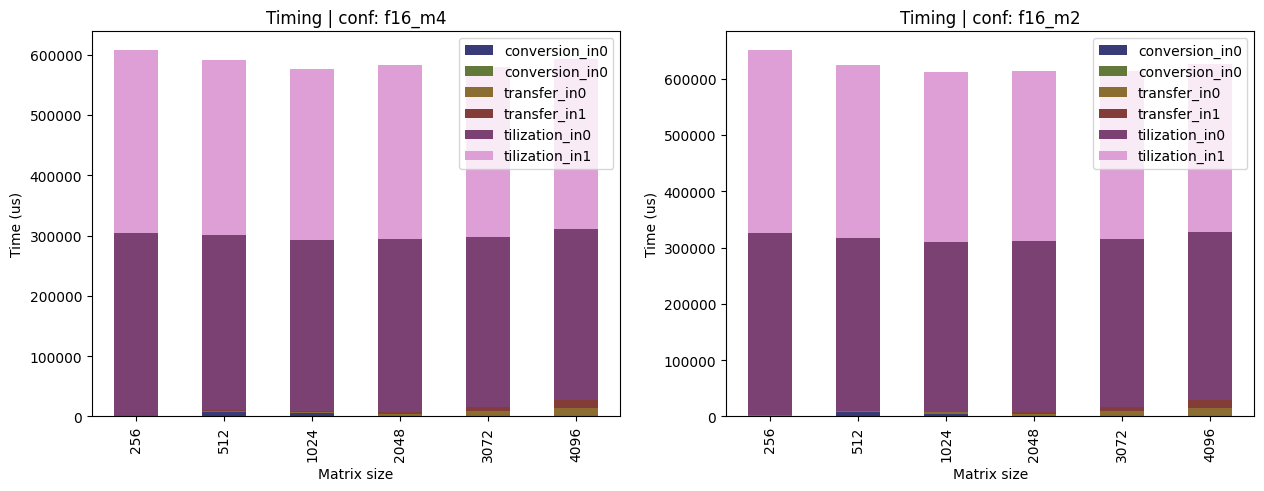

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf], df_transf0[conf], df_transf1[conf], df_tilization0[conf], df_tilization0[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in0", "transfer_in0", "transfer_in1", "tilization_in0", "tilization_in1"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

In [23]:
df_data_mv = df_conversion0 + df_conversion1 + df_transf0 + df_transf1 + df_tilization0 + df_tilization0
df_data_mv

,f16_m4,f16_m2
256,607846.162319,651641.469002
512,591631.176472,624884.698391
1024,576701.748371,612900.013924
2048,581937.518120,614776.356220
3072,578521.206379,613089.742661
4096,593212.800026,626191.411018


## Inference

In [24]:
df_sr = get_column_df_info(df, "second_run")
df_sr

,f16_m4,f16_m2
256,378.108025,389.828682
512,376.193523,378.787518
1024,523.178577,540.494919
2048,1201.982498,1267.437935
3072,2507.727146,2617.120743
4096,4798.047543,4820.868969


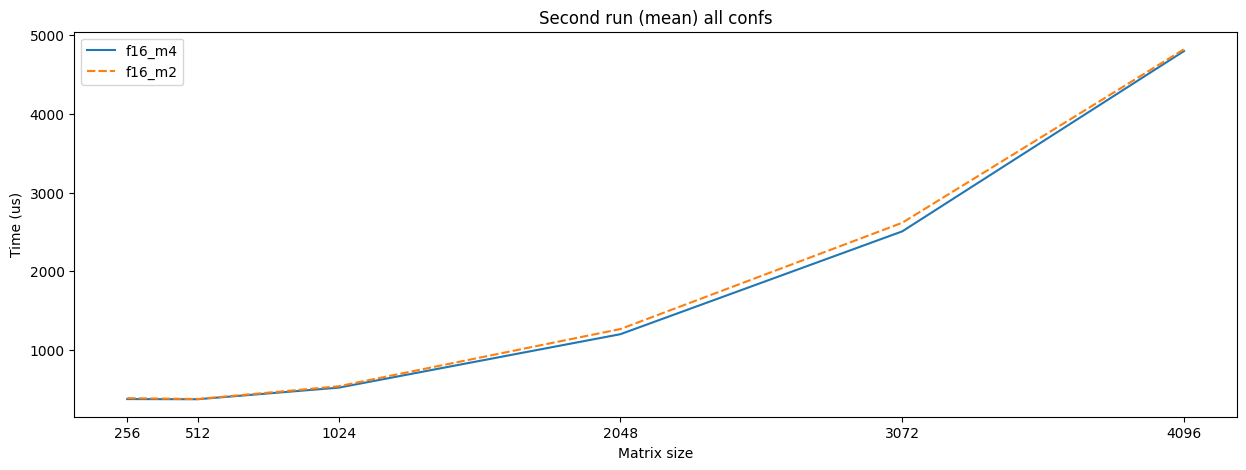

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_sr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Second run (mean) all confs")

plt.show()